In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from psana import *

<IPython.core.display.Javascript object>


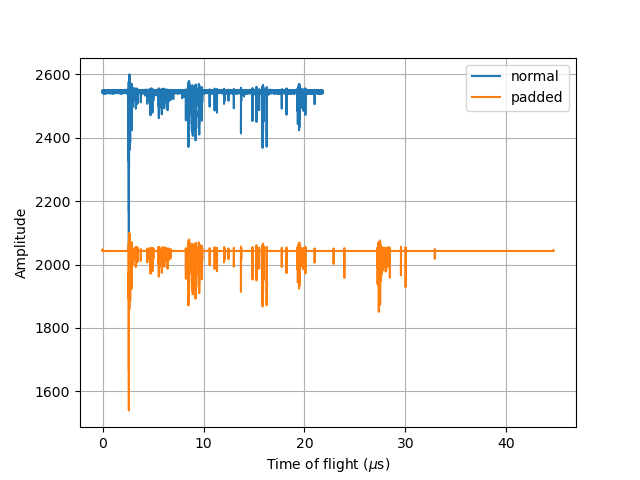

Text(0, 0.5, 'Amplitude')

In [3]:
exp = 'tmolw5618'
run = 99
ds = DataSource(exp=exp,run=run)
myrun = next(ds.runs())
hsd = myrun.Detector('hsd')

res = 0.167e-3
offset = 500

evt_ind = 10
for nevt,evt in enumerate(myrun.events()):

    if nevt<evt_ind:
        continue
    else:
        try:
            plt.figure()
            wf = hsd.raw.waveforms(evt)[0]
            plt.plot(np.arange(len(wf[0]))*res,wf[0]+offset,label='normal')
            pwf = hsd.raw.padded(evt)[0] ## command to access padded waveform
            plt.plot(np.arange(len(pwf[0]))*res,pwf[0],label='padded')            
            break
        except Exception as e:
            #print(e)
            break
plt.grid('on')
plt.legend(loc='best')
plt.xlabel('Time of flight ($\mu$s)')
plt.ylabel('Amplitude')